# SECOND POINT

We will to improve our results by building different CNN with different characteristics. We perform data augmentation in order to have more data to train my network

In [1]:
import os
import glob
import scipy
import cv2 as cv2
import numpy as np
import keras as ks
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sn
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Activation, BatchNormalization, AveragePooling2D, Dropout
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.regularizers import l2
from keras.utils import plot_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import import_ipynb
import dataSetUtility as dsu
import plottingUtility as pltu

importing Jupyter notebook from dataSetUtility.ipynb
importing Jupyter notebook from plottingUtility.ipynb


# DATA AUGMENTATION

To improve the results we try to increase the number of data following a transformation from left to right. To do this we use a method from the dataSetUtility.

In [2]:
#path to the directories
pathTrain=r'C:\Users\adria\Desktop\CVPR\ImageSet\train'
pathTest=r'C:\Users\adria\Desktop\CVPR\ImageSet\test'

labels = [os.path.basename(i) for i in glob.glob(pathTrain + '/*', recursive=True)]
numberOfClasses = len(labels)
print("Class number: ", numberOfClasses)
print("Class names: ", labels)

Class number:  15
Class names:  ['Bedroom', 'Coast', 'Forest', 'Highway', 'Industrial', 'InsideCity', 'Kitchen', 'LivingRoom', 'Mountain', 'Office', 'OpenCountry', 'Store', 'Street', 'Suburb', 'TallBuilding']


In [3]:
xTrainAug, yTrainAug = dsu.dataAugmentation(pathTrain, labels)
xTest, yTest = dsu.loadImages(pathTest, labels)
print("Train len: ", len(xTrainAug))
print("Train label len: ", len(yTrainAug))
print("---------------------------------")
print("Test len: ", len(xTest))
print("Test label len: ", len(yTest))

Train len:  3000
Train label len:  3000
---------------------------------
Test len:  2985
Test label len:  2985


In [4]:
yTrainCategorical = to_categorical(yTrainAug)
yTestCategorical = to_categorical(yTest)

In [5]:
xTrain, xValidation, yTrain, yValidation = train_test_split(xTrainAug, yTrainCategorical, train_size=0.85, random_state=275)
print('len Train Set: ',len(xTrain))
print('len Validation Set: ',len(xValidation))
print('len Test Set: ',len(xTest))

len Train Set:  2550
len Validation Set:  450
len Test Set:  2985


# CNN MODEL

Initially we try to apply the data augmentation to the cnn of point one

In [6]:
sgd = ks.optimizers.SGD(momentum=0.9,nesterov=True)
norm = ks.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)
baseModel = Sequential([
    #first convolutional layer
    Conv2D(8, 3,strides=1, padding='valid', activation='relu', input_shape=(64,64,1)),
    MaxPooling2D(pool_size=2,strides=2),
    
    #second convolutional layer
    Conv2D(16, 3,strides=1, padding='valid',activation='relu',input_shape=(64,64,1)),
    MaxPooling2D(pool_size=2,strides=2),
    
    #third convolutional layer
    Conv2D(32, 3,strides=1, padding='valid',activation='relu',input_shape=(64,64,1)),
    Flatten(),
    Dense(numberOfClasses, activation='relu',kernel_initializer=norm, bias_initializer='zeros'),
    Dense(numberOfClasses, activation='softmax')
])

baseModel.compile(loss='categorical_crossentropy', optimizer=sgd, metrics = ['accuracy'])

In [7]:
earlyStopping = EarlyStopping(min_delta=0.10,patience = 10, monitor='val_loss')

history=baseModel.fit(xTrain, yTrain, 
                      batch_size=32,epochs=100,
                      validation_data=(xValidation, yValidation),
                      shuffle=True,callbacks=[earlyStopping])

Epoch 1/100
80/80 [==============================] - 3s 33ms/step - loss: 2.7058 - accuracy: 0.0616 - val_loss: 2.6813 - val_accuracy: 0.0911
Epoch 2/100
80/80 [==============================] - 2s 20ms/step - loss: 2.6443 - accuracy: 0.1297 - val_loss: 2.4851 - val_accuracy: 0.2356
Epoch 3/100
80/80 [==============================] - 2s 19ms/step - loss: 2.4310 - accuracy: 0.2178 - val_loss: 2.3103 - val_accuracy: 0.2378
Epoch 4/100
80/80 [==============================] - 2s 19ms/step - loss: 2.2945 - accuracy: 0.2576 - val_loss: 2.0888 - val_accuracy: 0.2978
Epoch 5/100
80/80 [==============================] - 2s 20ms/step - loss: 2.0880 - accuracy: 0.3173 - val_loss: 1.9694 - val_accuracy: 0.3533
Epoch 6/100
80/80 [==============================] - 2s 19ms/step - loss: 1.8906 - accuracy: 0.3804 - val_loss: 1.7806 - val_accuracy: 0.4178
Epoch 7/100
80/80 [==============================] - 2s 19ms/step - loss: 1.6644 - accuracy: 0.4392 - val_loss: 1.8920 - val_accuracy: 0.3756
Epoch 

In [8]:
baseModel.evaluate(xTest, yTestCategorical)

prediction = baseModel.predict(xTest) 
yPred = dsu.predictClass(prediction)
cm=confusion_matrix(yTest, yPred)

94/94 [==============================] - 1s 6ms/step - loss: 3.5587 - accuracy: 0.3910


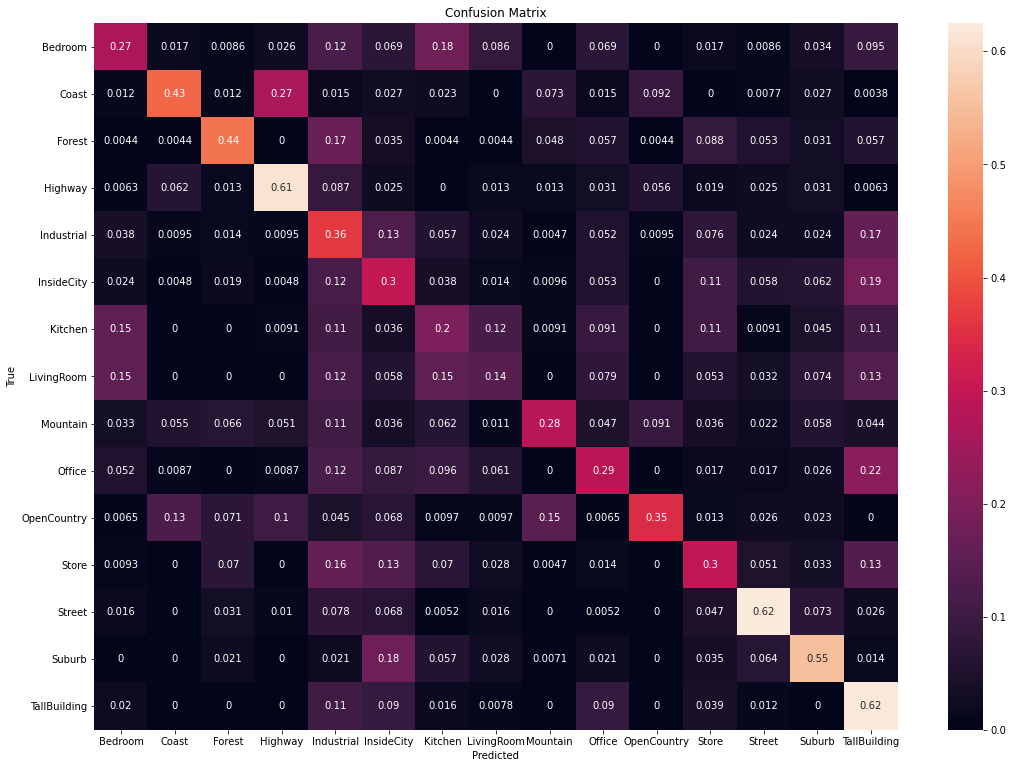

In [11]:
pltu.plotConfusionMatrix(cm, labels, "confusion_matrix_augmentation", "images_point_two/")

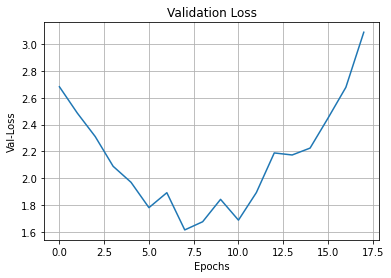

In [12]:
pltu.validationLoss(history, "images_point_two")

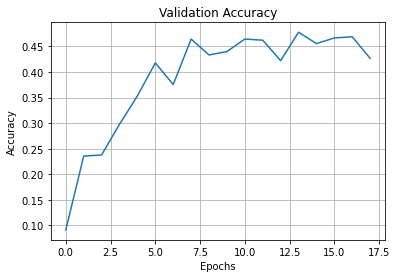

In [13]:
pltu.validationAccuracy(history, "images_point_two")

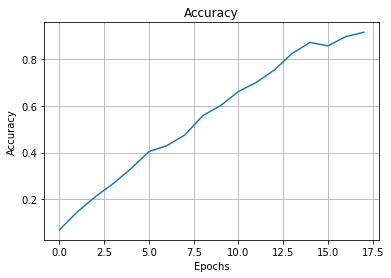

In [14]:
pltu.plottingAccuracy(history, "images_point_two")

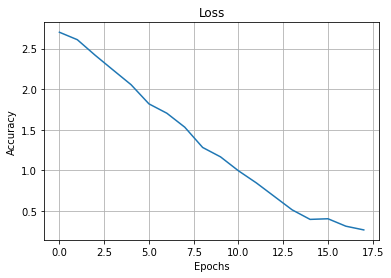

In [15]:
pltu.plottingLoss(history, "images_point_two")

In [17]:
pltu.plotModel(baseModel, 'images_point_two', 'firstCNN')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
